## 🌟  Pokémon: Explorando os dados para definir lendários

Este notebook tem como objetivo explorar dados sobre a franquia Pokémon e aplicar algoritmos de machine learning para prever se um Pokémon é lendário ou não com base em seus atributos estatísticos (como ataque, defesa, velocidade, etc).

Neste projeto de análise exploratória, me aprofundei nos dados do universo Pokémon para responder uma pergunta essencial: quais são os padrões que diferenciam um pokémon comum de um pokémon lendário?

Com base em um dataset contendo 802 pokémons de diversas gerações, avaliei atributos como tipo, estatísticas de combate e outras características que foram relevantes. A análise teve como objetivo gerar insights visuais e informativos que pudessem nos dar uma futura predição de quais pokémons têm potencial para serem lendários.

## 🎯 Objetivos

A análise contempla:
- Limpeza e preparação dos dados;
- Visualizações para entender o comportamento dos atributos;
- Aplicação de modelos de classificação (Logistic Regression, Random Forest);
- Comparação de acurácia entre os modelos.

In [38]:
!pip install pandas matplotlib seaborn scikit-learn

In [39]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Nesta etapa de importação das bibliotecas, utilizei:
- Pandas: manipulação de dados
- Matplotlib: visualização dos dados
- Seaborn: gráficos estátisticos

In [40]:
from google.colab import files
uploaded = files.upload()

Saving pokemon.csv to pokemon (2).csv


 Foi utilizado um dataset do Kaggle contendo informações de todos os 802 pokemons de todas as sete gerações

 Link do dataset: https://www.kaggle.com/datasets/rounakbanik/pokemon/data [The Complete Pokemon Dataset]

In [41]:
df = pd.read_csv('pokemon.csv')

In [42]:
df.head().T


,0,1,2,3,4
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1.0,1.0,1.0,0.5,0.5
against_dark,1.0,1.0,1.0,1.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,0.5,0.5,0.5,1.0,1.0
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1.0,1.0
against_fire,2.0,2.0,2.0,0.5,0.5
against_flying,2.0,2.0,2.0,1.0,1.0
against_ghost,1.0,1.0,1.0,1.0,1.0


Exibindo as principais características de 5 Pokémons iniciais da geração 1, cada coluna representando um Pokémon diferente e cada linha descreve um atributo ou estatística.

#Pré-processamento

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

Informações do dataset com
*colunas/ valores não nulos por coluna/ tipos de dados*

In [44]:
df.isnull().sum()

,0
abilities,0
against_bug,0
against_dark,0
against_dragon,0
against_electric,0
against_fairy,0
against_fight,0
against_fire,0
against_flying,0
against_ghost,0


Verificando as colunas com valores nulos: *height_m/ percentage_male/ type2/ weight_kg*

In [45]:
df.dtypes

,0
abilities,object
against_bug,float64
against_dark,float64
against_dragon,float64
against_electric,float64
against_fairy,float64
against_fight,float64
against_fire,float64
against_flying,float64
against_ghost,float64


Verificando os tipos de dados de cada coluna

#Limpeza e Tratamento dos Dados

In [46]:

df['height_m'] = df['height_m'].fillna(df['height_m'].mean())
df['weight_kg'] = df['weight_kg'].fillna(df['weight_kg'].mean())
df['percentage_male'] = df['percentage_male'].fillna(df['percentage_male'].mean())

df['type2'] = df['type2'].fillna('None')

Os valores númericos nulos foram substituídos pela média;
Na coluna *type2*, os valores categóricos foram substituídos por uma string 'None'.

Obs.: A coluna type2 representa o segundo tipo de elemento do Pokémon (Grass/Poison, Fire/Flying...). Porém, muitos Pokémon têm apenas um tipo, então esse campo vem nulo nesses casos.Os valores nulos em type2 foram preenchidos com 'None' para representar Pokémon monotipo, permitindo ao modelo aprender se essa característica é relevante para a predição de lendários.

In [47]:

df.isnull().sum().sum()


np.int64(0)

In [48]:

df_encoded = pd.get_dummies(df, columns=['type1', 'type2', 'generation'], drop_first=True)


Transformação dos dados categóricos para númericos para poder seguir com os *algoritmos de classificação*

In [49]:

df_encoded.shape, df_encoded.head()

((801, 79),
                      abilities  against_bug  against_dark  against_dragon  \
 0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
 1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
 2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
 3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
 4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
 
    against_electric  against_fairy  against_fight  against_fire  \
 0               0.5            0.5            0.5           2.0   
 1               0.5            0.5            0.5           2.0   
 2               0.5            0.5            0.5           2.0   
 3               1.0            0.5            1.0           0.5   
 4               1.0            0.5            1.0           0.5   
 
    against_flying  against_ghost  ...  type2_psychic  type2_rock  type2_steel  \
 0             2.0        

Conferência do dataset

#Análise Exploratória (EDA)


In [50]:
#Utilizei a biblioteca Plotly Express para criar gráficos interativos.
import plotly.express as px

#Filtrei o DataFrame para considerar apenas os Pokémon lendários
fig = px.bar(df[df["is_legendary"] == 1],
             x="name",
             y="base_total",
             color="generation",
             title="Pokémons Lendários e Estatísticas Totais")
fig.update_layout(xaxis_title="Pokémon", yaxis_title="Base Total", xaxis_tickangle=-45)
fig.show()

O gráfico nos mostra Pokémons lendários organizados pelas estatísticas totais a partir da coluna *base_total*, sendo uma soma de atributos como ataque, defesa, velocidade e outros.

As cores representam a geração na qual cada Pokémon pertence, permitindo identificar padrões ao longo das gerações. Também é possível observar que alguns dos lendários de gerações recentes possuem estatísticas elevadas, indicando um possível power creep *(tendência de jogos inserirem novos personagens, habilidades ou itens cada vez mais fortes do que os anteriores)* ao longo do tempo.

In [51]:
# Filtrei o DataFrame para considerar apenas os lendários, contar eles por geração e manter a ordem
lendarios_por_geracao = df[df["is_legendary"] == 1]["generation"].value_counts().sort_index()

# Criei um novo dataframe com duas colunas
df_lendarios_gen = pd.DataFrame({
    "generation": lendarios_por_geracao.index,
    "quantidade": lendarios_por_geracao.values
})

# Mapeamento das gerações
nomes_geracoes = {
    1: "1ª (Kanto)",
    2: "2ª (Johto)",
    3: "3ª (Hoenn)",
    4: "4ª (Sinnoh)",
    5: "5ª (Unova)",
    6: "6ª (Kalos)",
    7: "7ª (Alola)",
    8: "8ª (Galar)",
    9: "9ª (Paldea)"
}
df_lendarios_gen["geracao_nome"] = df_lendarios_gen["generation"].map(nomes_geracoes)


fig = px.bar(df_lendarios_gen,
             x="geracao_nome",
             y="quantidade",
             text="quantidade",
             title="Quantidade de Pokémons Lendários por Geração",
             labels={"geracao_nome": "Geração", "quantidade": "Quantidade Lendários"},
             color="quantidade",
             color_continuous_scale="Viridis")

fig.update_layout(xaxis_tickangle=-45)
fig.show()


Neste gráfico há a quantidade de Pokémons lendários inseridos em cada geração. Ele ajuda a identificar se as gerações mais recentes têm apresentado mais lendários e como a franquia tem evoluído ao longo do tempo.
E como pode-se perceber, a geração mais recente é a que mais possui pokémons lendários.

In [52]:
# Filtrei o DataFrame para considerar apenas os lendários
lendarios = df[df["is_legendary"] == 1]

# Ordenei os lendários mediante à coluna base_total e selecionei os 5 primeiros
top5_lendarios = lendarios.sort_values("base_total", ascending=False).head(5)


fig = px.bar(top5_lendarios,
             x="name",
             y="base_total",
             color="type1",
             title="Top 5 Pokémons lendários",
             labels={"name": "Pokémon", "base_total": "Estatísticas Totais", "type1": "Tipo"  },
             text="base_total")

fig.update_layout(xaxis_tickangle=-45)
fig.show()

O gráfico mostra os 5 Pokémons lendários com maior poder total baseado em
atributos de combate. Cada barra mostra o valor da soma de seus stats, como ataque, defesa, velocidade... Dessa forma, pode se identificar quais são os mais poderosos segundo a base oficial. Esses lendários são frequentemente os mais difíceis de enfrentar ou capturar.

In [53]:
# Criei a coluna legendario_texto que traduz os valores da coluna is_legendary: 0 vira "Comum"/1 vira "Lendário"

df["legendario_texto"] = df["is_legendary"].replace({0: "Comum", 1: "Lendário"})

fig = px.histogram(df, x="legendario_texto", color="legendario_texto",
                   title="Pokémons Lendários vs Comuns",
                   labels={"legendario_texto": "Tipo de Pokémon"},
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis_title="", yaxis_title="Quantidade", showlegend=False)
fig.show()


Neste gráfico uma pequena fração dos Pokémons são considerados lendários, cerca de 70, eles são projetados para serem mais raros e poderosos. Enquanto o restante, cerca de 731, são comuns e mais fáceis de capturar.


In [54]:
# É contado quantos Pokémon existem de cada tipo primário (type1)
type_counts = df["type1"].value_counts().reset_index()
type_counts.columns = ["type1", "count"]

fig = px.bar(type_counts,
             x="count",
             y="type1",
             orientation="h",
             title="Distribuição dos Pokémons por tipo primário dos elementos",
             labels={"type1": "Type1", "count": "Quantidade"},
             color="count",
             color_continuous_scale="viridis")

fig.update_layout(yaxis=dict(categoryorder="total ascending"))
fig.show()

Seguindo nesta linha de exploração dos dados, os tipos *Water*, *Normal* e *Grass* são os mais comuns.

Isso pode refletir a variedade desses tipos ao longo das gerações.

*Obs.: devido a muitos valores nulos na coluna "type2", ocorreu a substituição dos valores para uma string 'None', não sendo possível ocorrer ao longo da EDA uma comparação de tipos de elementos entre as colunas "type1" e "type2".*

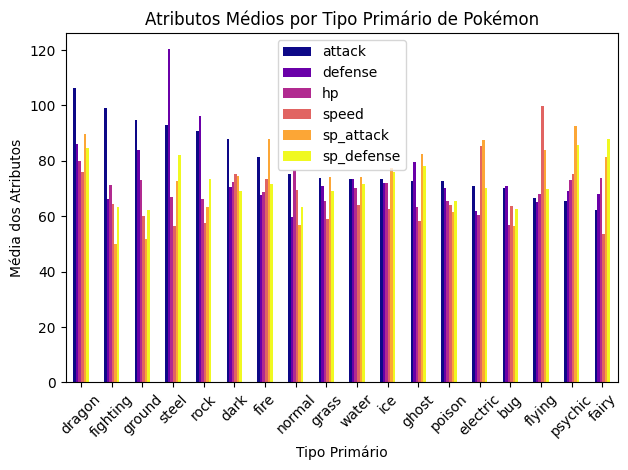

In [55]:
# Lista com os atributos estatísticos dos Pokémon
status_cols = ['attack', 'defense', 'hp', 'speed', 'sp_attack', 'sp_defense']
mean_stats_by_type = df.groupby('type1')[status_cols].mean().sort_values(by='attack', ascending=False)

mean_stats_by_type[status_cols].plot(kind='bar', stacked=False, colormap='plasma')
plt.title('Atributos Médios por Tipo Primário de Pokémon')
plt.ylabel('Média dos Atributos')
plt.xlabel('Tipo Primário')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nesta visualização foi feita uma lista com as colunas dos atributos dos Pokemon, em seguida, agrupei os dados pelo tipo primário (type1) e calculei a média de cada atributo dentro de cada tipo, por fim, apenas ordenei os resultados pela média de 'attack', do maior para o menor. Pokémons do tipo **Dragon** e **Psychic** se destacam com atributos médios muito altos, indicando que esses tipos tendem a ser mais fortes nos jogos.


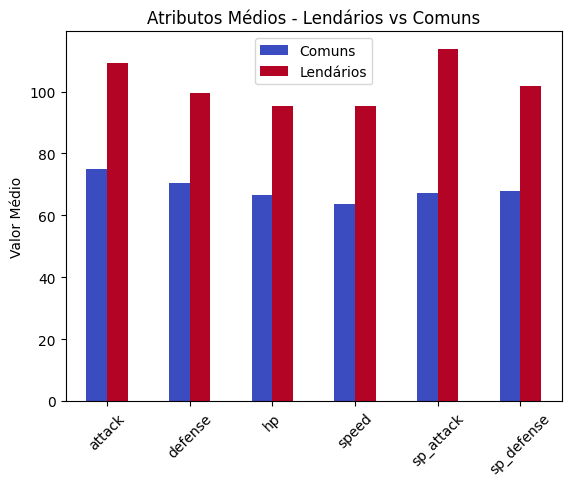

In [56]:
# Agrupei os dados por is_legendary e calculei a média dos atributos
df.groupby('is_legendary')[status_cols].mean().T.plot(kind='bar', colormap='coolwarm')
plt.title('Atributos Médios - Lendários vs Comuns')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.legend(['Comuns', 'Lendários'])
plt.show()

Neste gráfico os lendários são superiores em todos os atributos. Isso reforça sua exclusividade e papel especial dentro do jogo.


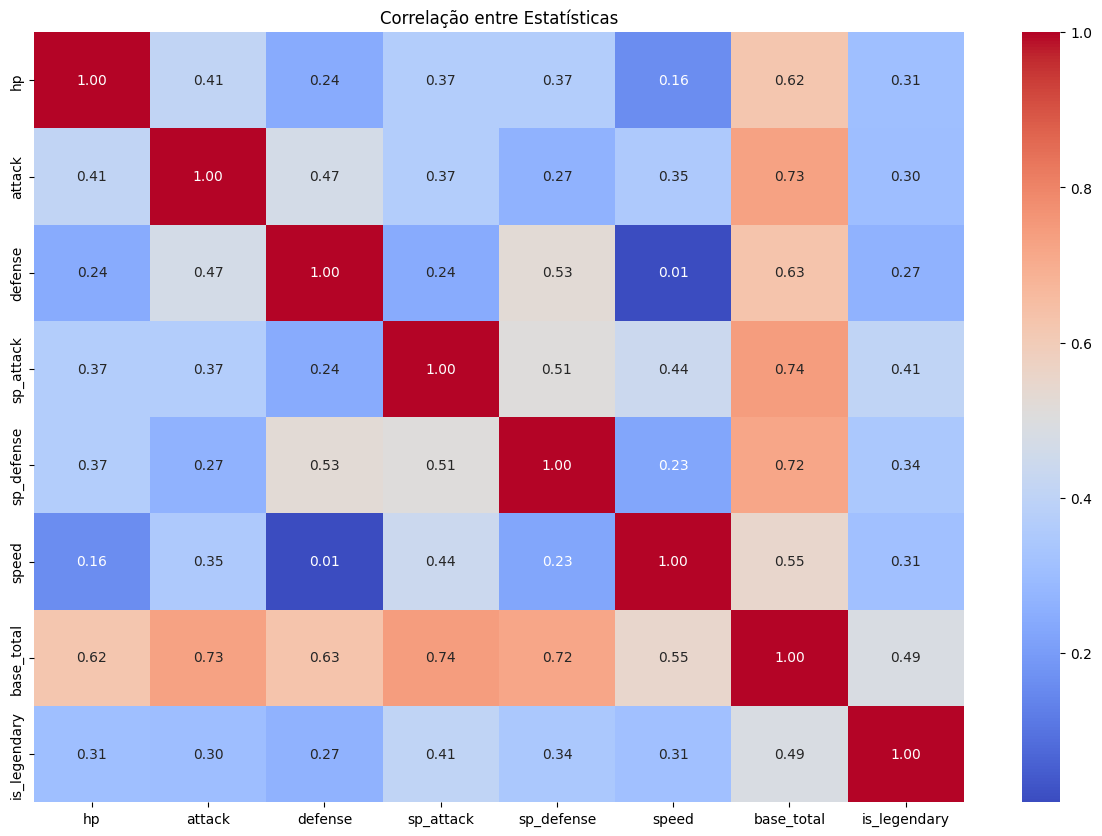

In [57]:
# Matriz de correlação
plt.figure(figsize=(15,10))
stats_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'base_total']
correlation = df[stats_cols + ['is_legendary']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre Estatísticas")
plt.show()

A estatística da coluna (base_total) tem alta correlação com todos os atributos individuais, pois é composta por eles. Além disso, atributos como attack e sp_attack, e defense e sp_defense, também mostram correlações relevantes entre si. A presença de correlação positiva entre is_legendary e quase todos os atributos indica que os lendários geralmente possuem valores mais altos em suas estatísticas.

# 2º parte - Prevendo se um Pokémon é Lendário

In [58]:
# Cópia do dataframe para modelagem
df_model = df.copy()

# Removi as colunas que não devem entrar no modelo
cols_to_drop = ['pokedex_number', 'capture_rate', 'type2']
df_model = df_model.drop(columns=cols_to_drop)

# Removi as linhas com valores ausentes
df_model = df_model.dropna()

# Transformei a variável target
y = df_model['is_legendary']
X = df_model.drop(columns='is_legendary')


Preparei os dados (X e y) para treinar um modelo que classifica se um Pokémon é lendário ou não (is_legendary).

In [59]:
# Tipos de dados de cada coluna
print(X.dtypes)


abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed                  int64
type1         

In [60]:
# Remoção da coluna abilities
X = X.drop(columns=['abilities'], errors='ignore')


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selecionei as colunas úteis
cols_utilizadas = [
    'type1', 'type2', 'generation', 'attack', 'defense', 'hp', 'speed',
    'sp_attack', 'sp_defense', 'base_total', 'weight_kg', 'height_m', 'is_legendary'
]
df_model = df[cols_utilizadas].copy()

# Tratei os valores nulos
df_model['type2'] = df_model['type2'].fillna('None')
df_model['weight_kg'] = df_model['weight_kg'].fillna(df_model['weight_kg'].mean())
df_model['height_m'] = df_model['height_m'].fillna(df_model['height_m'].mean())

# Transformei variáveis categóricas em dummies
df_model = pd.get_dummies(df_model, columns=['type1', 'type2', 'generation'], drop_first=True)

# Separei X e y
X = df_model.drop('is_legendary', axis=1)
y = df_model['is_legendary']

# Escalonamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("✅ Pré-processamento finalizado!")
print("Formato dos dados de treino:", X_train.shape)

✅ Pré-processamento finalizado!
Formato dos dados de treino: (560, 50)


✅ Passo 3: Treinamento dos modelos - Random Forest


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Treinamento do modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Avaliação
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       220
           1       0.86      0.57      0.69        21

    accuracy                           0.95       241
   macro avg       0.91      0.78      0.83       241
weighted avg       0.95      0.95      0.95       241



In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Treinamento do modelo de Regressão Logística
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Prevendo o modelo
y_pred_lr = lr.predict(X_test)

# Avaliação da acurácia
acc_rf = accuracy_score(y_test, y_pred)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Acurácia - Random Forest: {:.2f}".format(acc_rf))
print("Acurácia - Logistic Regression: {:.2f}".format(acc_lr))

Acurácia - Random Forest: 0.95
Acurácia - Logistic Regression: 0.94


In [64]:
from sklearn.linear_model import LogisticRegression

# Treinando o modelo Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(random_state=42)

Nesta etapa, treinamos o modelo com 2 tipos de algoritmos de classificação para comparar o resultado da acurácia de cada um.

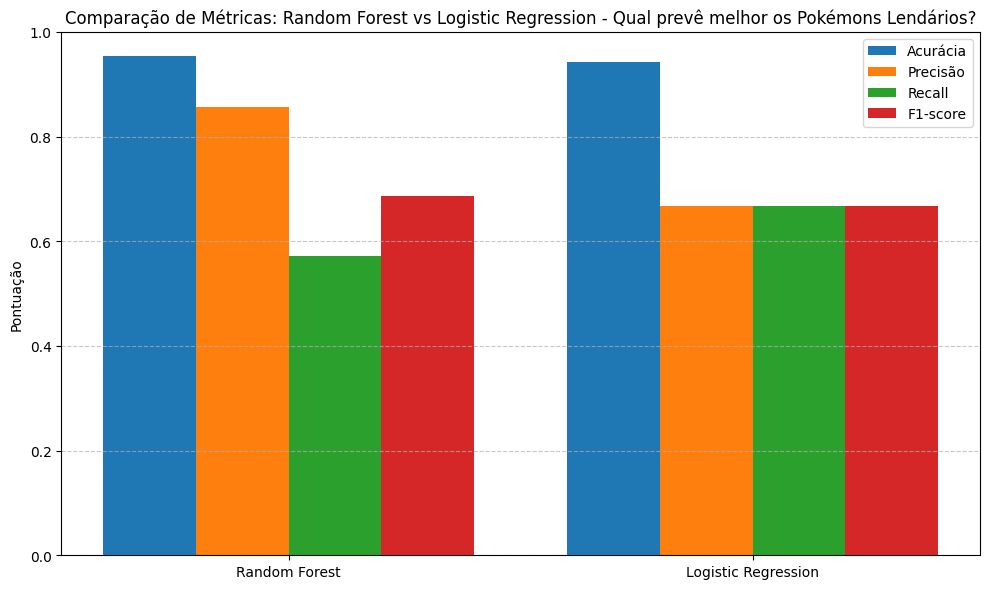

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Métricas para Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Métricas para Random Forest (já calculadas para y_pred)
acc_rf = accuracy_score(y_test, y_pred)
prec_rf = precision_score(y_test, y_pred)
rec_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Agrupando para gráfico
modelos = ['Random Forest', 'Logistic Regression']
acuracias = [acc_rf, acc_lr]
precisoes = [prec_rf, prec_lr]
recalls = [rec_rf, rec_lr]
f1_scores = [f1_rf, f1_lr]

x = np.arange(len(modelos))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - 1.5*width, acuracias, width, label='Acurácia')
ax.bar(x - 0.5*width, precisoes, width, label='Precisão')
ax.bar(x + 0.5*width, recalls, width, label='Recall')
ax.bar(x + 1.5*width, f1_scores, width, label='F1-score')

ax.set_ylabel('Pontuação')
ax.set_title('Comparação de Métricas: Random Forest vs Logistic Regression - Qual prevê melhor os Pokémons Lendários?')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Este gráfico compara o desempenho de dois modelos de inteligência artificial na tarefa de prever se um Pokémon é lendário ou não. As métricas mostram que o modelo Random Forest teve melhores resultados em precisão, recall e F1-score, indicando maior capacidade de identificar corretamente os Pokémons lendários.

In [66]:
# Prevendo com Random Forest
df["predito_lendario_rf"] = rf.predict(X_scaled)

# Prevendo com Logistic Regression
df["predito_lendario_lr"] = logreg.predict(X_scaled)

In [71]:
import plotly.express as px
import pandas as pd

# Filtrando os Pokémons preditos como lendários para Random Forest
pokemons_preditos_rf = df[df["predito_lendario_rf"] == 1]
pokemons_preditos_rf["modelo"] = "Random Forest"

# Filtrando os Pokémons preditos como lendários para Logistic Regression
pokemons_preditos_lr = df[df["predito_lendario_lr"] == 1]
pokemons_preditos_lr["modelo"] = "Logistic Regression"

# Combinando todos os dataframes
pokemons_preditos = pd.concat([pokemons_preditos_rf, pokemons_preditos_lr])

# Gráfico
fig = px.bar(pokemons_preditos,
             x="name",
             y="base_total",
             color="modelo",
             title="Pokémons Lendários Previstos por Random Forest e Logistic Regression",
             labels={"name": "Nome do Pokémon", "base_total": "Total Base"},
             text="base_total",
             color_discrete_map={"Random Forest": "blue", "Logistic Regression": "red"})  # Especificando cores

fig.update_layout(xaxis_tickangle=-45)
fig.show()


<ipython-input-71-72e97a4dc93b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-72e97a4dc93b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Este gráfico mostra os Pokémons que foram previstos como lendários por dois modelos de inteligência artificial: um chamado Random Forest e o outro Logistic Regression.
Cada barra representa um Pokémon, e o tamanho da barra mostra o quanto ele é forte no total de atributos (como ataque, defesa, velocidade, etc).
As cores indicam qual modelo identificou aquele Pokémon como lendário.
Isso ajuda a comparar quais modelos acharam quais Pokémons mais poderosos e parecidos com os lendários oficiais do jogo.

## ✅ Conclusões

- A maior parte dos Pokémons são do tipo **Water**, **Normal** e **Grass**.

- Ao longo do tempo ocorreu um *power creep* e as *gerações mais recentes* são as que obtiveram as *habilidades mais altas* e a última geração possui o total maior de pokémons lendários.

- Foi possível identificar os 5 pokémons lendários mais fortes, sendo: Mewtwo...
- Apenas 10% dos Pokémons são **lendários**, mas dominam em **todos os atributos**.
- Tipos como **Dragon**, **Psychic** e **Steel** são os mais fortes, em média.